# Funções
Nessa Lecture, iremos abordar as funções e como construí-las. Para  isso iremos importar os seguintes pacotes

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

## Built- In Funcions
O Python tem um número de *built-inn* functions que estão disponíveis sem utilizar o `import.`Por exemplo:

In [2]:
max(10,100)

100

In [3]:
print('Hello World')

Hello World


In [7]:
str(34)

'34'

In [6]:
type(10/2)

float

Podemos também utilziar com uma lista de operadores Booleanos:

In [9]:
bools= False, True, True
all(bools) #Irá nos dar True se todos forem True e False se pelo menos um não

False

In [10]:
any(bools) #Irá nos dar falso se todos são falsos e verdade c.c

True

### Third Party Functions

Como já vimos, a maioria das funções não estão imbutidas no Python. Com isso, precisamos importar. Por exemplo, se queremos saber se determinado ano é bissexto ou não:

In [12]:
import calendar

calendar.isleap(2020)

True

## Definindo Funções

Em diversas ocasiões, é útil definir as nossas funções.  

### Sintaxe Básica
Se quisermos definir uma função afim:
$$f(x) = 2x+1 $$

In [13]:
def f(x):
    return 2*x+1

Já que definimos a função, vamos ver os resulados:

In [14]:
f(1)

3

In [15]:
f(10)

21

Como fizemos no nosso último exercício da Lecture 2, podemos criar uma função módulo:

In [20]:
def new_abs_function(x):

    if x < 0:
        abs_value = -x
    else:
        abs_value = x

    return abs_value

Vamos revisar a sintaxe aqui.

`def` é uma palavra-chave do Python usada para iniciar definições de funções.

`def new_abs_function(x):` indica que a função é chamada `new_abs_function` e que ela tem um único argumento `x`.

O código indentado é um bloco de código chamado de corpo da função.

A palavra-chave `return` indica que `abs_value` é o objeto que deve ser retornado para o código que a chama.

Toda essa definição de função é lida pelo interpretador Python e armazenada na memória.




In [21]:
print(new_abs_function(100))
print(new_abs_function(-100))

100
100


In [22]:
print(new_abs_function(0))

0


Da última Lecture, tivemos o seguinte código:

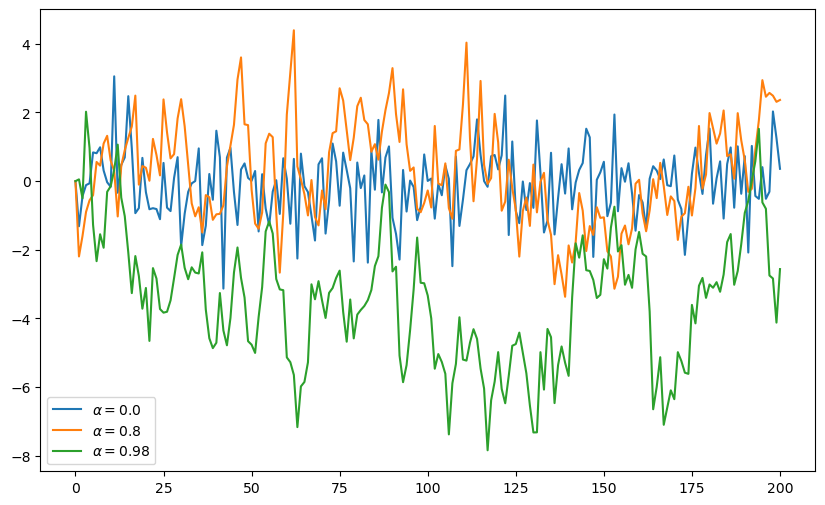

In [23]:
α_values = [0.0, 0.8, 0.98]
T = 200
x = np.empty(T+1)

for α in α_values:
    x[0] = 0
    for t in range(T):
        x[t+1] = α * x[t] + np.random.randn()
    plt.plot(x, label=f'$\\alpha = {α}$')

plt.legend()
plt.show()

Note que, em   `plt.plot(x, label=f'$\\alpha = {α}$')`, utilizamos um = no argumento `label`. Isto é chamado um *keyword argument*, com `label` sendo a *keyword*. *Non-keyword arguments* são chamados de *positional arguments*, uma vez que  esses argumentos irão ser determinados por sua ordem. Por exemplo:

`plot(x, 'b-', label="white noise")` é diferente de `plot('b-', x, label="white noise")`

`Keyword arguments` são úteis quando a função tem diversos argumentos, quando e difícil de lembrar a ordem certa. É possível replicar essa sintaxe:

In [24]:
def f(x,a=1,b=1):
    return a+b*x

In [25]:
f(2)

3

Podemos modificar:

In [26]:
f(2,a=4,b=5)

14

Conforme discutido na palestra anterior, as funções em Python são muito flexíveis.

Em particular,

- Qualquer número de funções pode ser definido em um arquivo dado.

- Funções podem ser (e frequentemente são) definidas dentro de outras funções.

- Qualquer objeto pode ser passado para uma função como argumento, incluindo outras funções.

- Uma função pode retornar qualquer tipo de objeto, inclusive funções.

Vamos dar exemplos de quão simples é passar uma função para uma função nas seções seguintes.

### One Line Functions: `lambda`

Podemos usar `lambda` como uma função simples. Por exemplo


In [27]:
def f(x):
    return x**3

In [28]:
f(2)

8

In [29]:
f = lambda x: x**3

In [30]:
f(2)

8

Ela é útil se quisermos calcular por exemplo uma integral:

In [31]:
from scipy.integrate import quad

quad(lambda x: x**3, 0,2)

(4.0, 4.440892098500626e-14)

Note que a sintaxe de `quad`é dada por: `quad((f,a,b)` em que `f`é uma função e `a` é o limite inferior e `b` o superior.

## Aplicação:

Podemos fazer o mesmo da última lecture:

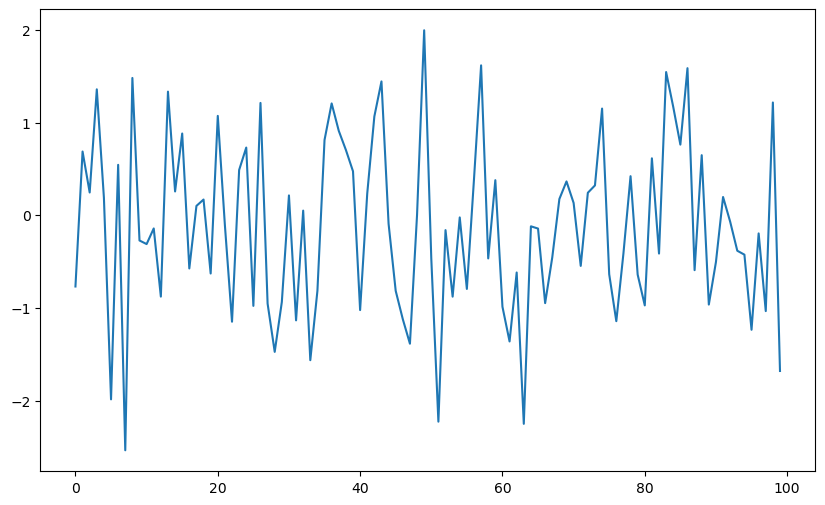

In [32]:
ts_length = 100
ϵ_values = []   # empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

plt.plot(ϵ_values)
plt.show()

Vamos dividir este programa em duas partes:

1. Uma função definida pelo usuário que gera uma lista de variáveis aleatórias.

2. A parte principal do programa que

   - chama esta função para obter os dados
   - plota os dados

Isso é realizado no programa a seguir.


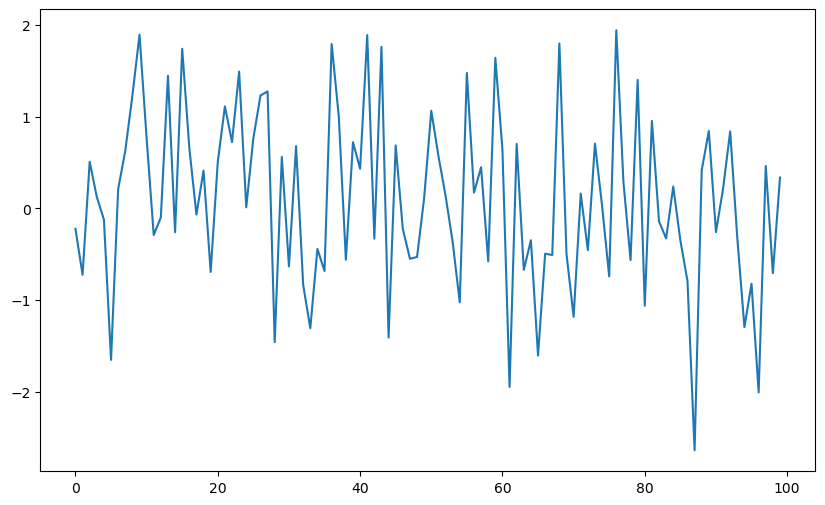

In [33]:
def generate_data(n): #definimos a funcao generate_data com argumento n
    ϵ_values = [] #criamos uma lista vazia
    for i in range(n): #usamos o loop para
        e = np.random.randn() #criamos uma variável aleatoria 
        ϵ_values.append(e) #colocamos ela na lista inicialmente vazia
    return ϵ_values

data = generate_data(100) #criamos um objeto dada a função com n=100
plt.plot(data)
plt.show()

### Adicionando novas condições
Podemos deixar mais elaborado, adicionando outros arguentos. No caso, podemos dar a habilidade de retornar valores de uma normal padrão ou de uma distribuição uniforme (0,1).

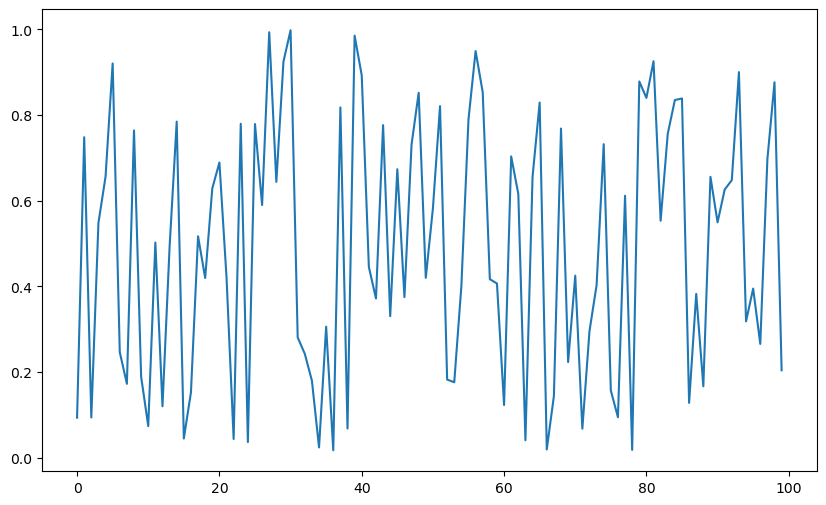

In [37]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        if generator_type == 'U':
            e=np.random.uniform(0,1)
        else:
            e=np.random.randn()
        ϵ_values.append(e)
    return ϵ_values 

data = generate_data(100,'U')
plt.plot(data)
plt.show()

Note que:

1. Estamos deixando U em *string* ao escrever como: 'U'
2. Estamos usando um argumento Booleano em U, visto que colocamos a sintaxe `==`e não `=`

- Por exemplo, `a=10`irá nos atribuir o valor 10 para `a`
- Se colocarmos `a==10` iremos dar os valores `True`ou `False`, dependendo do valor de `a`.

Uma outra forma de escrever o código é a seguinte:



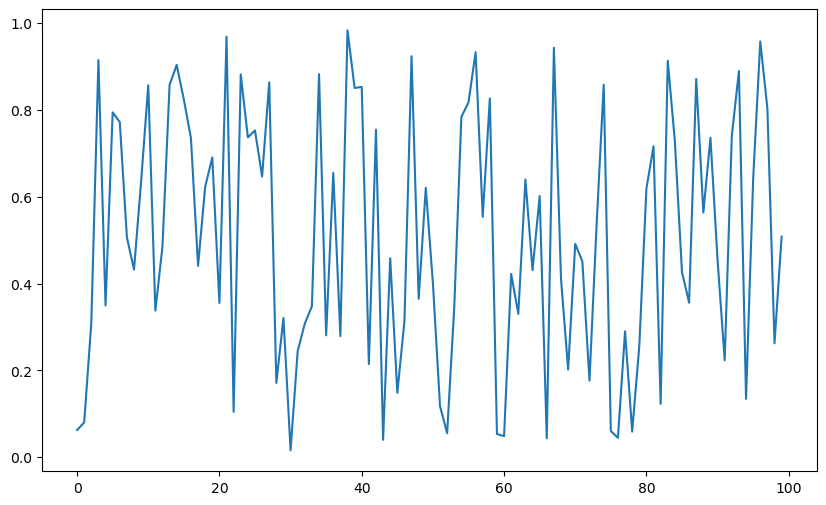

In [45]:
def generate_data(n,generator_type):
    ϵ_values = []
    for i in range(n):
        e = generator_type()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100,np.random.uniform)
plt.plot(data)
plt.show()
    
    
    

Basicamente iremos utilizar o segundo argumento uma distribuição uniforme. 
Quando a chamada de função `generate_data(100, np.random.uniform)` é executada, o Python executa o bloco de código da função com `n` igual a 100 e o nome `generator_type` "vinculado" à função `np.random.uniform`.


O mesmo é válido para ume exemplo mais simples:

In [46]:
max(7,2,4)

7

In [47]:
m=max
m(7,2,4)

7

## Recursive Function Calls

É basicamente uma função que chama ela mesma. Por exxemplo:

$$x_{t+1} = 2x_t, \ x_0 =1$$

Note que,

$$x_1 = 2\times 1$$
$$x_2= 2^2$$
$$\cdots$$
$$ x_{t+1} = 2^t$$
Fazendo isso recursivamente, sabemos que a resposta é $2^t$. Podemos fazer isso por meio de um *loop*.

In [48]:
def x_loop(t):
    x=1
    for i in range(t):
        x=2*x
    return x

ou

In [49]:
def x(t):
    if t==0:
        return 1
    else:
        return 2*x(t-1)

Com isso, é possível resolver por exemplo equações em diferenças.

## Exercícios
Criar uma função fatorial:



In [59]:
def fatorial(n):
    if n< 0:
        return "O fatorial não está definido para números negativos"
    elif n == 0 or n == 1:
        return 1
    else:
        resultado = 1
        for i in range(2, n + 1):
            resultado *= i
        return resultado

#Note que utilizamos o operador *=. Ele irá nos dar a variavel
#Multiplicada pelo valor especificado


    

In [60]:
fatorial(10)

3628800

Uma outra forma de realizar o desejado é:

In [63]:
def fatorial(n):
    k = 1
    for i in range(n):
        k = k * (i + 1)
    return k

fatorial(-13)

1

####  Acumulação de Valores em Python
Existem diversas formas de fazer essa mesma operação. No início, usei o operador `*=`. Ele faz parte de um conjunto de operadores que permitem acumular valores.
Em Python, é possível realizar operações de acumulação de várias maneiras. Além do uso do operador de atribuição (`=`) com uma operação matemática, como `k = k * (i + 1)`, você pode usar operadores de acumulação específicos, como `+=`, `-=` , `*=` e `/=`. Aqui estão alguns exemplos:

- `+=`: Este operador é usado para adicionar um valor à variável existente. Exemplo:

    ```python
    k += (i + 1)
    ```

- `-=`: Este operador é usado para subtrair um valor da variável existente. Exemplo:

    ```python
    k -= (i + 1)
    ```

- `*=`: Este operador é usado para multiplicar a variável pelo valor especificado. Exemplo:

    ```python
    k *= (i + 1)
    ```

- `/=`: Este operador é usado para dividir a variável pelo valor especificado. Exemplo:

    ```python
    k /= (i + 1)
    ```



##### Exercício 2

Temos que criar uma função binomial `binomial_rv` tal que `binomial_rv(n,p)`irá nos dar  uma amostra de Y


In [76]:
from numpy.random import uniform

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        if U < p:
            count += 1    
    return count

binomial_rv(10, 0.5)

5

#### Exercício 3 - Sequência de Fibonacci

Ela é descrita por:

$$x_{t+1} = x_t + x_{t-1}$$


In [1]:
def fibonacci(n):
    if n <= 0:
        return "A posição deve ser um número inteiro positivo."
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        a, b = 0, 1
        for _ in range(2, n):
            a, b = b, a + b
        return b

fibonacci(10)

34

A linha `a, b = 0, 1` é uma forma compacta de atribuir valores a múltiplas variáveis em Python.


Aqui está como funciona em mais detalhes:

- `a, b = 0, 1`: Esta linha cria duas variáveis, `a` e `b`, e atribui a elas os valores 0 e 1, respectivamente. Isso é feito em uma única linha, separando os valores com uma vírgula.

- Durante a primeira iteração do loop, `a` é igual a 0 e `b` é igual a 1, representando os dois primeiros números da sequência de Fibonacci.

- Na próxima iteração do loop, `a` e `b` são atualizados para `b` e `a + b`, respectivamente. Isso significa que `a` agora armazena o valor anterior de `b`, e `b` armazena a soma dos dois valores anteriores (que é o próximo número na sequência de Fibonacci).

- Este processo de atualização de `a` e `b` é repetido `n - 2` vezes (onde `n` é a posição desejada na sequência de Fibonacci), para calcular o valor da sequência na posição `n`.


